<a href="https://colab.research.google.com/github/ymuto0302/base2_2020/blob/master/economicdata1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 経済データの分析(1) : 環境構築および Quandl の利用

今回より経済データ・金融データを対象に分析を進める。

経済・金融データの入手方法として，従来は Yahoo! ファイナンス等からのスクレイピングが主流だったが，現在では（システムにかかる負荷等を考慮し）スクレイピングは概ね禁止されている。

そこで Quandlからデータ収集することとする。

Quandlでは金融・経済に関する世界中のデータ・セットを無料で利用できる。また，日本のデータであるGDPや日経平均株価も取得可能である。（注：一部有料のデータも含まれる）

https://www.quandl.com/

## Quandl へのユーザ登録 ＆ API キーの取得
一定量のデータを入するため，Quandl へのユーザ登録が必要である。また，プログラムを用いてデータ取得するため API key が要求される。

Quandl へのユーザ登録および API キーの取得について，別途資料を提供したので，そちらを参照してほしい。

## Quandl ライブラリのインストール
下記のコマンドを入力することで，Google Colab にて Quandl ライブラリが利用可能となる。

Quandl では JSON や CSV 形式のファイルをダウンロードできるが，（別途にファイルを保存するよりも）ライブラリを用いて動的にデータを取得する方が楽である。

In [2]:
!pip install quandl

## Quandl からのデータ入手
東京証券取引所(Tokyo Stock Exchange; TSE)で扱われる銘柄の株価を取得する。
データ取得期間は 2017年1月1日～2017年12月31日とする。

ここで TSE コード (stock indicator) が必要となるが，Yahoo! ファイナンス等を利用して取得するものとする。

https://stocks.finance.yahoo.co.jp/stocks/qi/?ids=3650

In [3]:
import quandl # Quandl ライブラリのインポート

quandl.ApiConfig.api_key = "sw0123456789" # Quandl API key の設定

# ソニーと日立製作所の株価データを取得する
# 6758 : stock indicator
# ソニー(株) の TSEコードは 6758，(株)日立製作所のそれは 6501
#
sony = quandl.get('TSE/6758', start_date='2017-01-01', end_date='2017-12-31')
hitachi = quandl.get('TSE/6501', start_date='2017-01-01', end_date='2017-12-31')

取得したデータは，以下に示すように pandas のデータフレームとなっている。

In [5]:
sony

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-04,3305.0,3333.0,3274.0,3333.0,5914000.0
2017-01-05,3335.0,3337.0,3269.0,3296.0,7201700.0
2017-01-06,3328.0,3374.0,3311.0,3316.0,8873600.0
2017-01-10,3345.0,3439.0,3344.0,3394.0,11461200.0
2017-01-11,3464.0,3550.0,3462.0,3510.0,13620000.0
...,...,...,...,...,...
2017-12-18,5068.0,5163.0,5067.0,5161.0,7103000.0
2017-12-19,5150.0,5156.0,5110.0,5116.0,4931600.0
2017-12-20,5135.0,5138.0,5089.0,5125.0,3576900.0


ソニーと日立の株価の推移を可視化する。

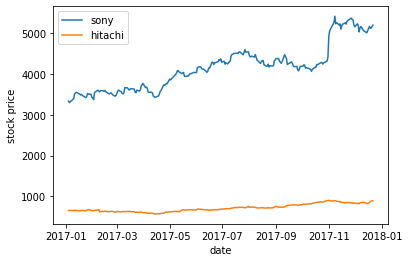

In [6]:
import matplotlib.pyplot as plt
plt.plot(sony['Close'], label='sony')
plt.plot(hitachi['Close'], label='hitachi')
plt.legend()
plt.xlabel("date")
plt.ylabel("stock price")
plt.show()

## 株価の移動平均
移動平均とは〇〇〇〇

以下ではソニーの株価を用いて，〇〇〇〇

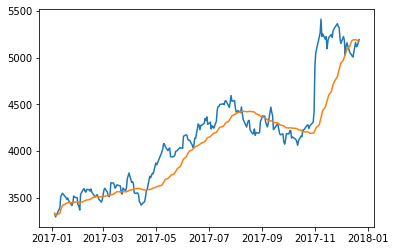

In [8]:
# 移動平均 (MA: moving aberage)
#
# ソニー(株)/ (6758)
import quandl
import matplotlib.pyplot as plt

quandl.ApiConfig.api_key = "sw0123456789"
sony = quandl.get('TSE/6758', start_date='2017-01-01', end_date='2017-12-31')

# 移動平均 (MA: moving aberage) ここでは 30日移動平均を求めている
sony['30MA'] = sony['Close'].rolling(window=30, min_periods=0).mean()

plt.plot(sony['Close'])
plt.plot(sony['30MA'])
plt.show()

## 複数のデータを同時に取得する
以下では日本，韓国，中国の人口 100人あたりのインターネットユーザ数を同時に取得する。

In [13]:
import quandl # Quandl ライブラリのインポート

quandl.ApiConfig.api_key = "sw0123456789" # Quandl API key の設定

# Internet users (per 100 people)
df = quandl.get(["WWDI/JPN_IT_NET_USER_P2", # Japan のインターネットユーザ数
                 "WWDI/KOR_IT_NET_USER_P2", # Korea のインターネットユーザ数
                 "WWDI/CHN_IT_NET_USER_P2"]) # China のインターネットユーザ数
df.columns = ["Japan", "Korea", "China"] # 列名の付け替え

In [12]:
df

,Japan,Korea,China
Date,,,
1990-12-31,0.020294,0.023265,0.000000
1991-12-31,0.040438,0.046124,NaN
1992-12-31,0.096678,0.098404,NaN
1993-12-31,0.401278,0.249947,0.000169
1994-12-31,0.799684,0.311359,0.001168
1995-12-31,1.594363,0.819687,0.004955
1996-12-31,4.372982,1.624237,0.013082
1997-12-31,9.163077,3.600802,0.032395
1998-12-31,13.414041,6.781815,0.168540


データの中身を可視化する。

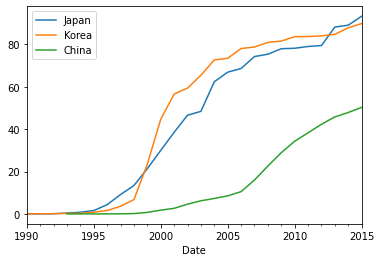

In [14]:
df.plot()